In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
try:
    import scienceplots
    plt.style.use('science')
except:
    pass
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 10})


### Try creating three intersections by adjusting $\alpha_1$, $\alpha_2$, $\beta$, and $\gamma$

Text(0, 0.5, '$u$')

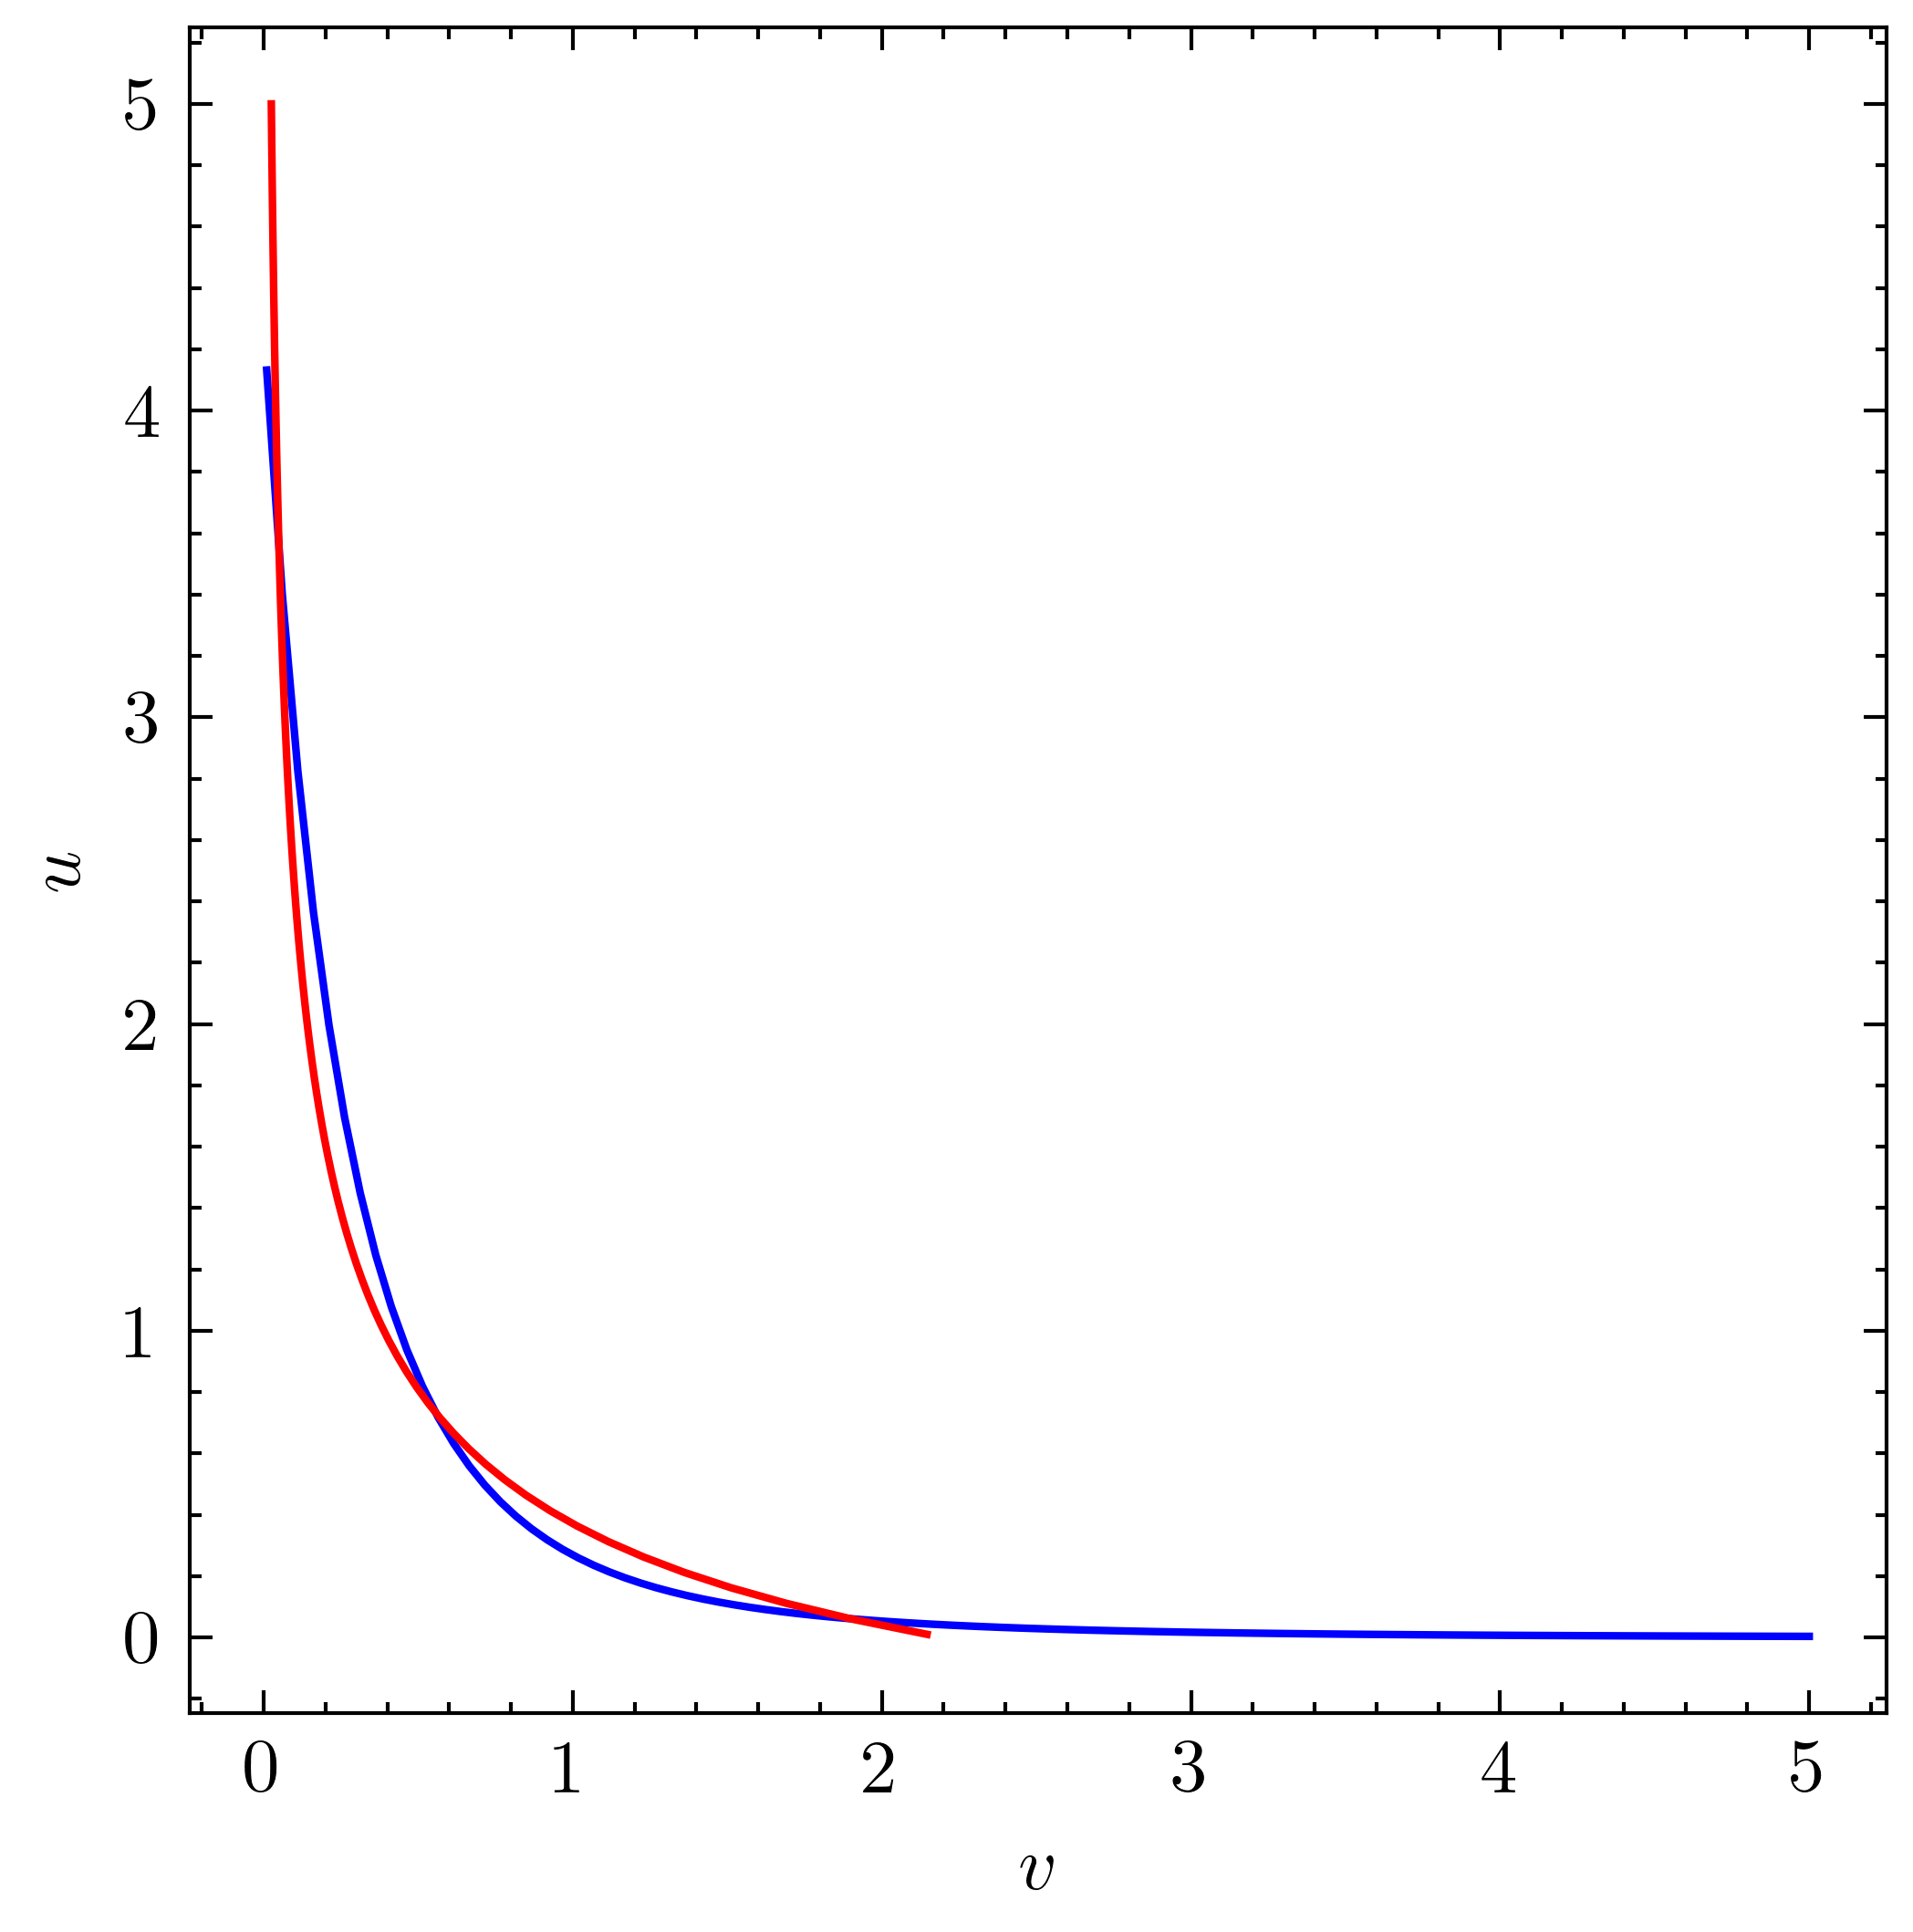

In [2]:
alpha_1 = 4.3
alpha_2 = 2.2
beta = 4
gamma = 2.5

fig, ax = plt.subplots(figsize=(4, 4))
v_list = np.linspace(0.01, 5, 100)
u_list = alpha_1 / (v_list + 1)** beta
ax.plot(v_list, u_list, c="b", label=r"$\frac{du}{dt}=0$")
u_list = np.linspace(0.01, 5, 100)
v_list = alpha_2 / (u_list + 1) ** gamma
ax.plot(v_list, u_list, c="r", label=r"$\frac{dv}{dt}=0$")
ax.set_xlabel(r"$v$")
ax.set_ylabel(r"$u$")
# ax.set_title("Nullcline plot")

### Solve the roots for $\frac{du}{dt}=\frac{dv}{dt}=0$

In [3]:
def run_fsolve(func, params):
    roots = []
    for param in params:
        candidate = np.array(fsolve(func, param))
        is_dup = False
        for root in roots:
            for dim in range(root.ndim):
                if np.isclose(candidate[dim], root[dim]):
                   is_dup = True 
                   break
            if is_dup:
                break
        if not is_dup:
            roots.append(candidate)
    return np.array(roots)

def to_solve(x):
    return [alpha_2 / (1 + x[0])**gamma - x[1],
            alpha_1 / (1 + x[1])**beta - x[0]]

u = np.linspace(0.01, 10, 20)
v = np.linspace(0.01, 10, 20)
uu, vv = np.meshgrid(u, v)
params = np.stack([np.ravel(uu), np.ravel(vv)], axis=1)
res = run_fsolve(to_solve, params)
print(res)

[[0.73358161 0.55598356]
 [3.53419852 0.05025408]
 [0.06103819 1.8971215 ]]


### Annotate the figure with the coordinates of the roots 

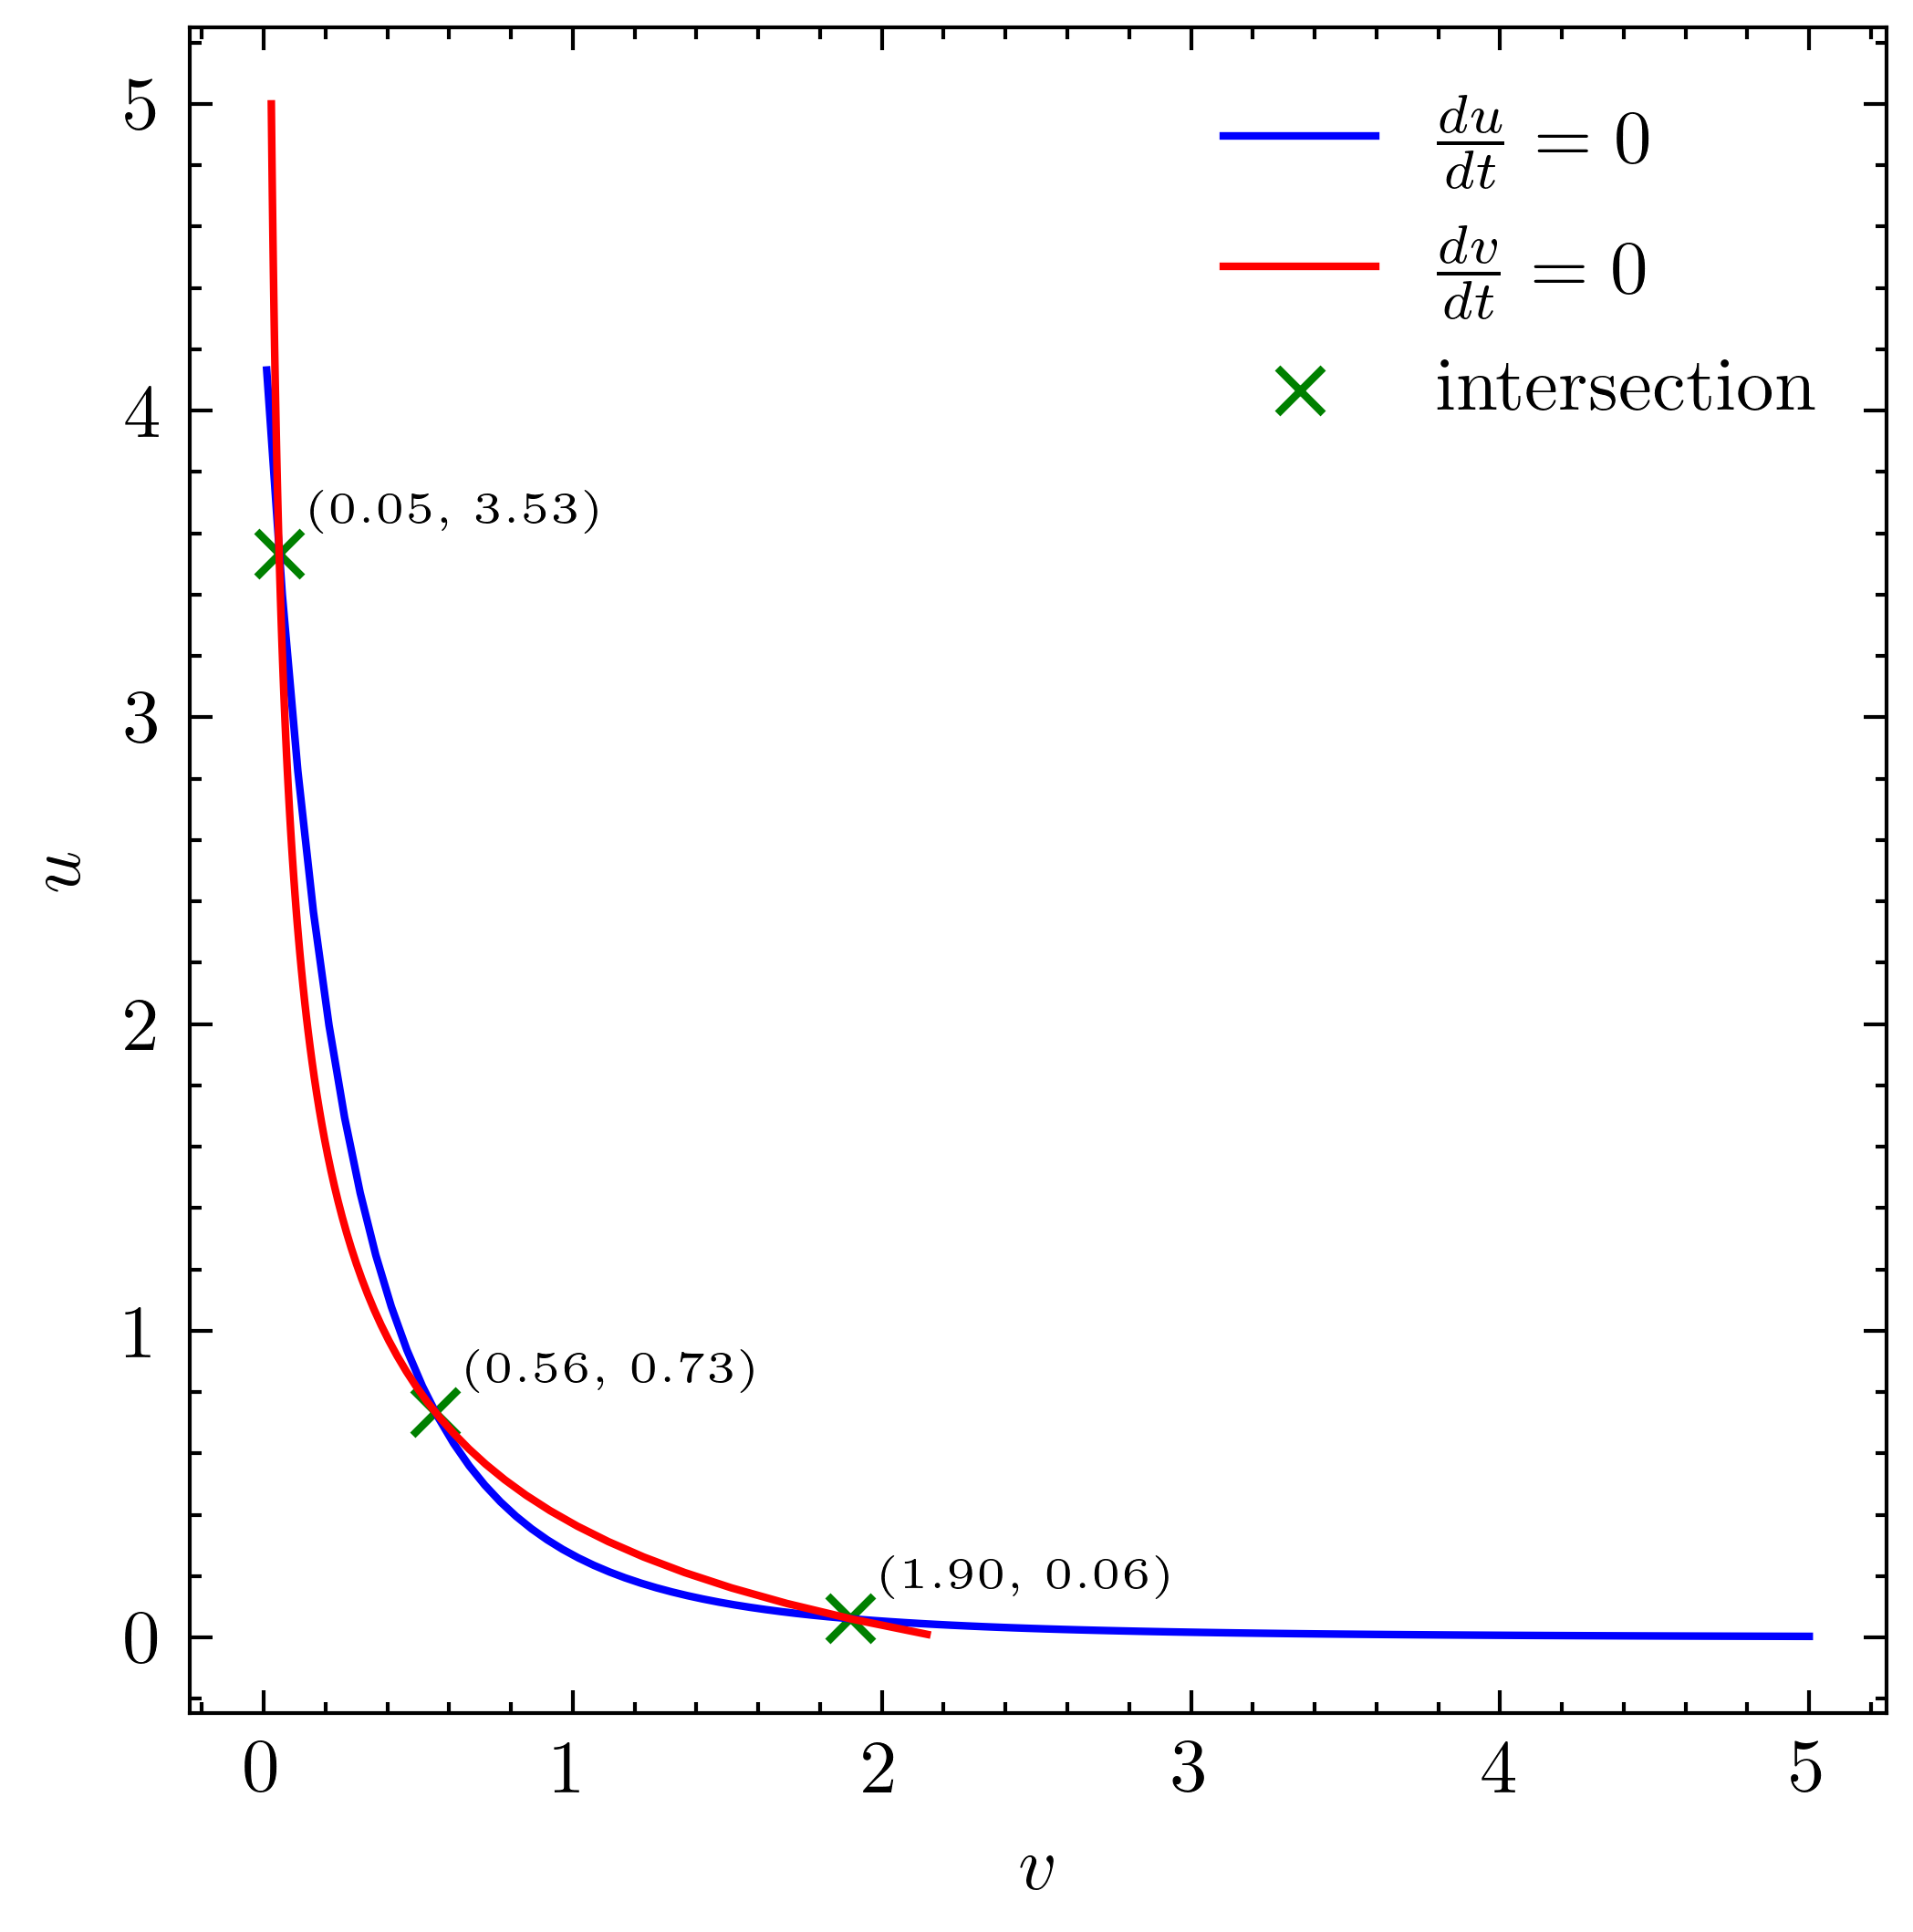

In [4]:
ax.scatter(res[:, 1], res[:, 0], marker="x", label="intersection", c="g")
ax.legend()
for r in res:
    ax.text(r[1]+0.1, r[0]+0.1, f"({r[1]:.2f}, {r[0]:.2f})", fontsize="xx-small")
fig

### Use the set of parameters just found to create a bistable circuit

In [5]:
# Define a function which calculates the derivative
def single_step(conc, t):
    u, v = conc
    if t > 40 and t < 45:
        g = 0.5
        b = beta
    elif t > 80 and t < 85:
        b = 0.5
        g = gamma
    else:
        b = beta
        g = gamma
    # b = beta
    # g = gamma
    du_dt = alpha_1 / (1 + v)**b - u
    dv_dt = alpha_2 / (1 + u)**g - v
    return du_dt, dv_dt

def plot_circuit(u, v, ts):
    # Plot the numerical solution
    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_xlabel("t")
    ax.set_ylabel("expression level")
    ax.plot(ts, u, 'r', label='u')
    ax.plot(ts, v, 'b', label='v')
    ax.legend()
    ymax = max([max(u), max(v)]) + 0.3
    ax.fill_betweenx([-1, ymax+1], 40, 45, facecolor="yellow", alpha=0.3)
    ax.fill_betweenx([-1, ymax+1], 80, 85, facecolor="lightgreen", alpha=0.3)
    ax.set_ylim(-0.15, ymax)

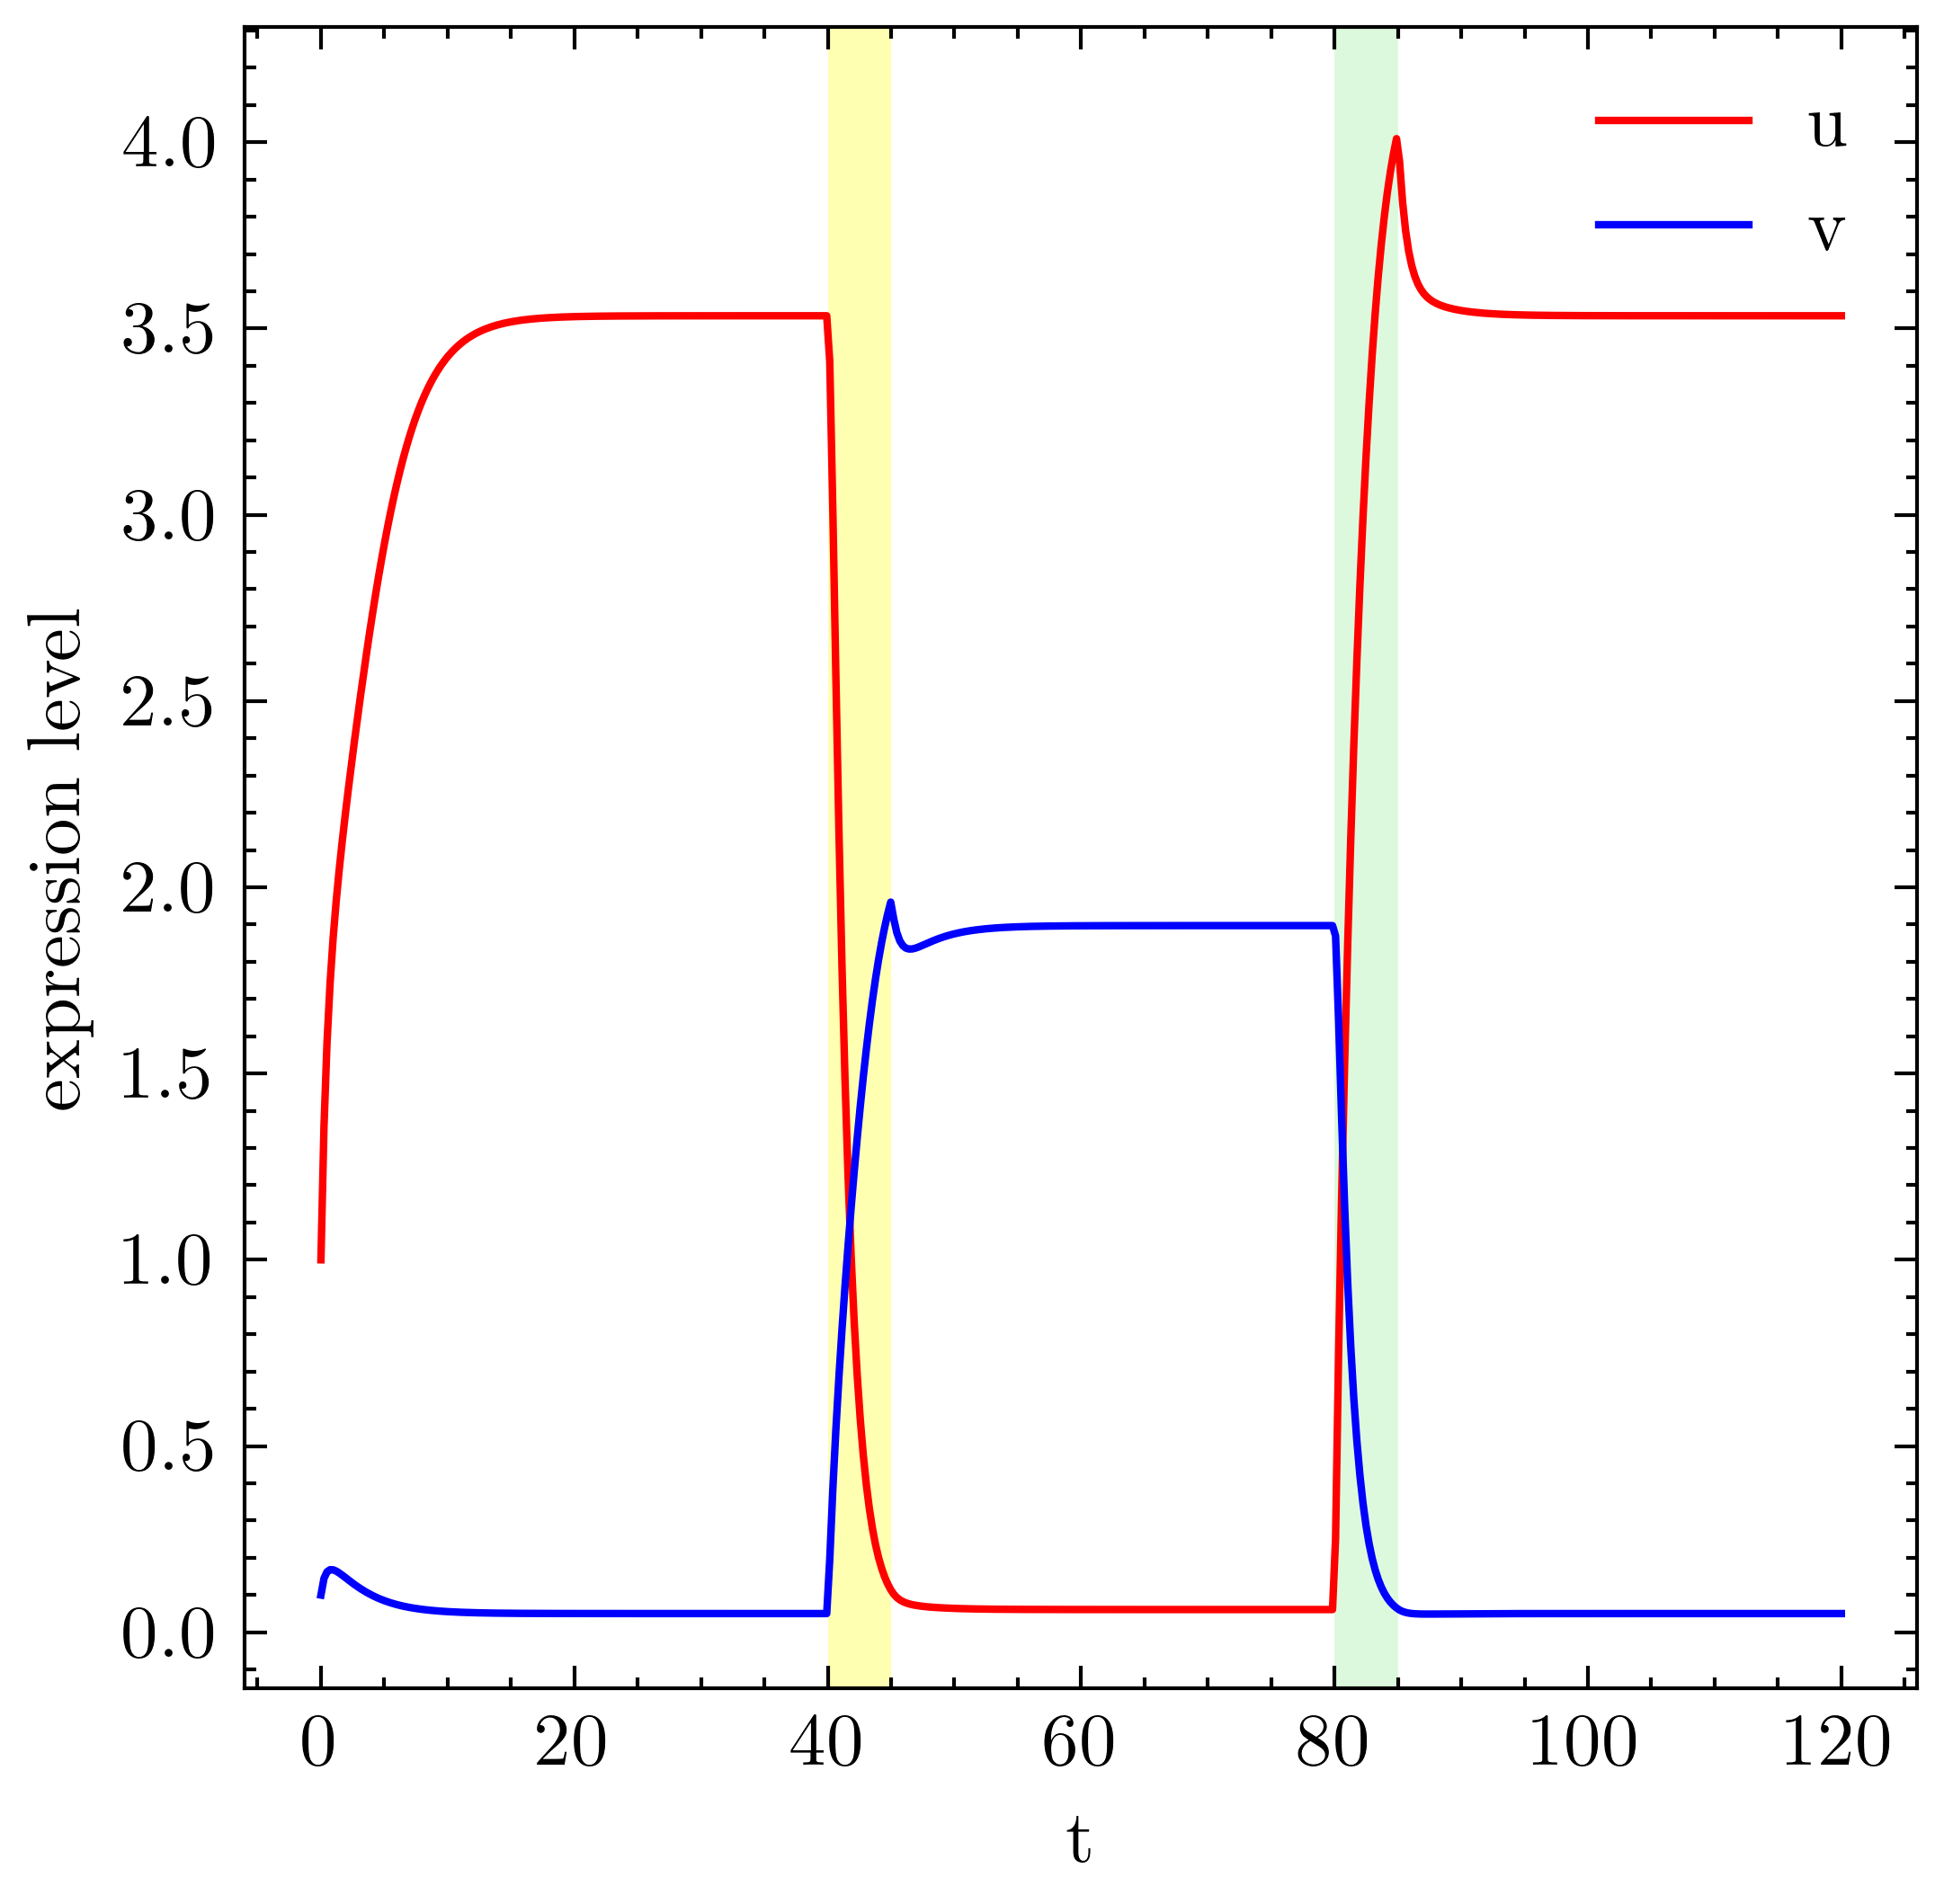

In [6]:
initial_u = 1
initial_v = 0.1

t_end = 120
steps = 500

ts = np.linspace(0, t_end, steps)
result = odeint(single_step, [initial_u, initial_v], ts)
u, v = result.T

plot_circuit(u, v, ts)

### Create monostable circuits

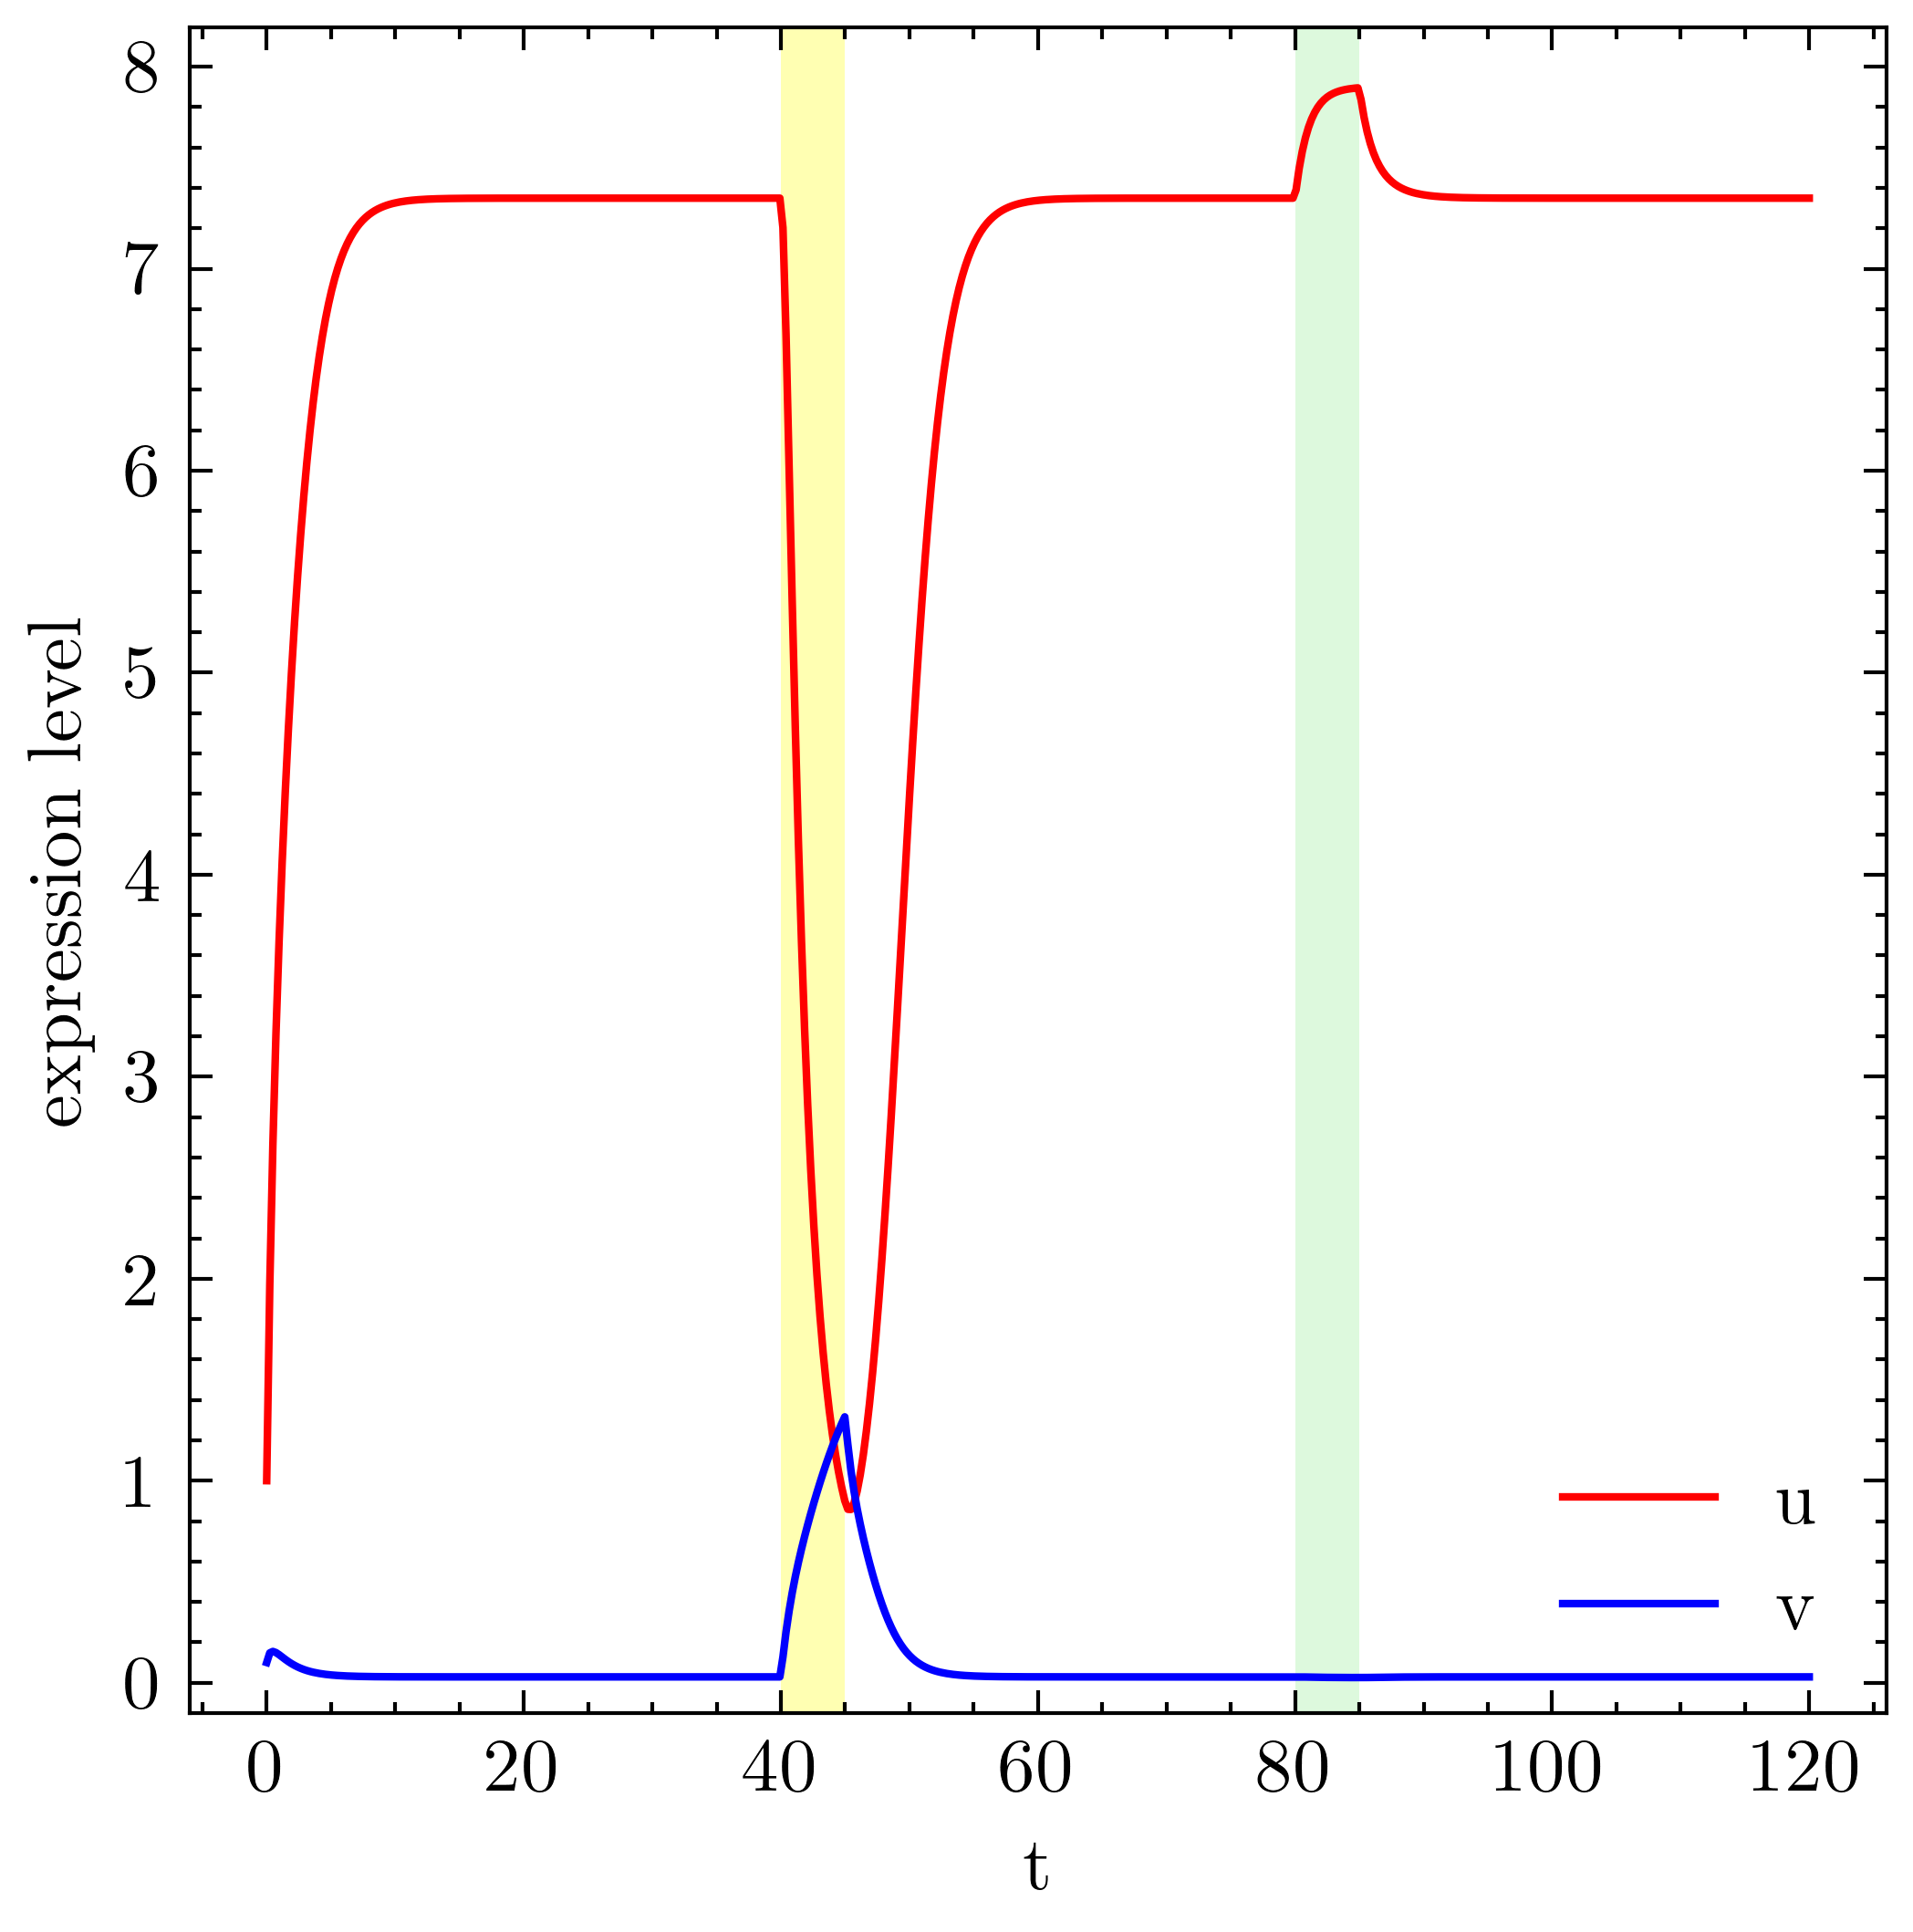

In [7]:
alpha_1 = 8
alpha_2 = 2
beta = 3
gamma = 2
initial_u = 1
initial_v = 0.1

t_end = 120
steps = 500

ts = np.linspace(0, t_end, steps)
result = odeint(single_step, [initial_u, initial_v], ts)
u, v = result.T

plot_circuit(u, v, ts)

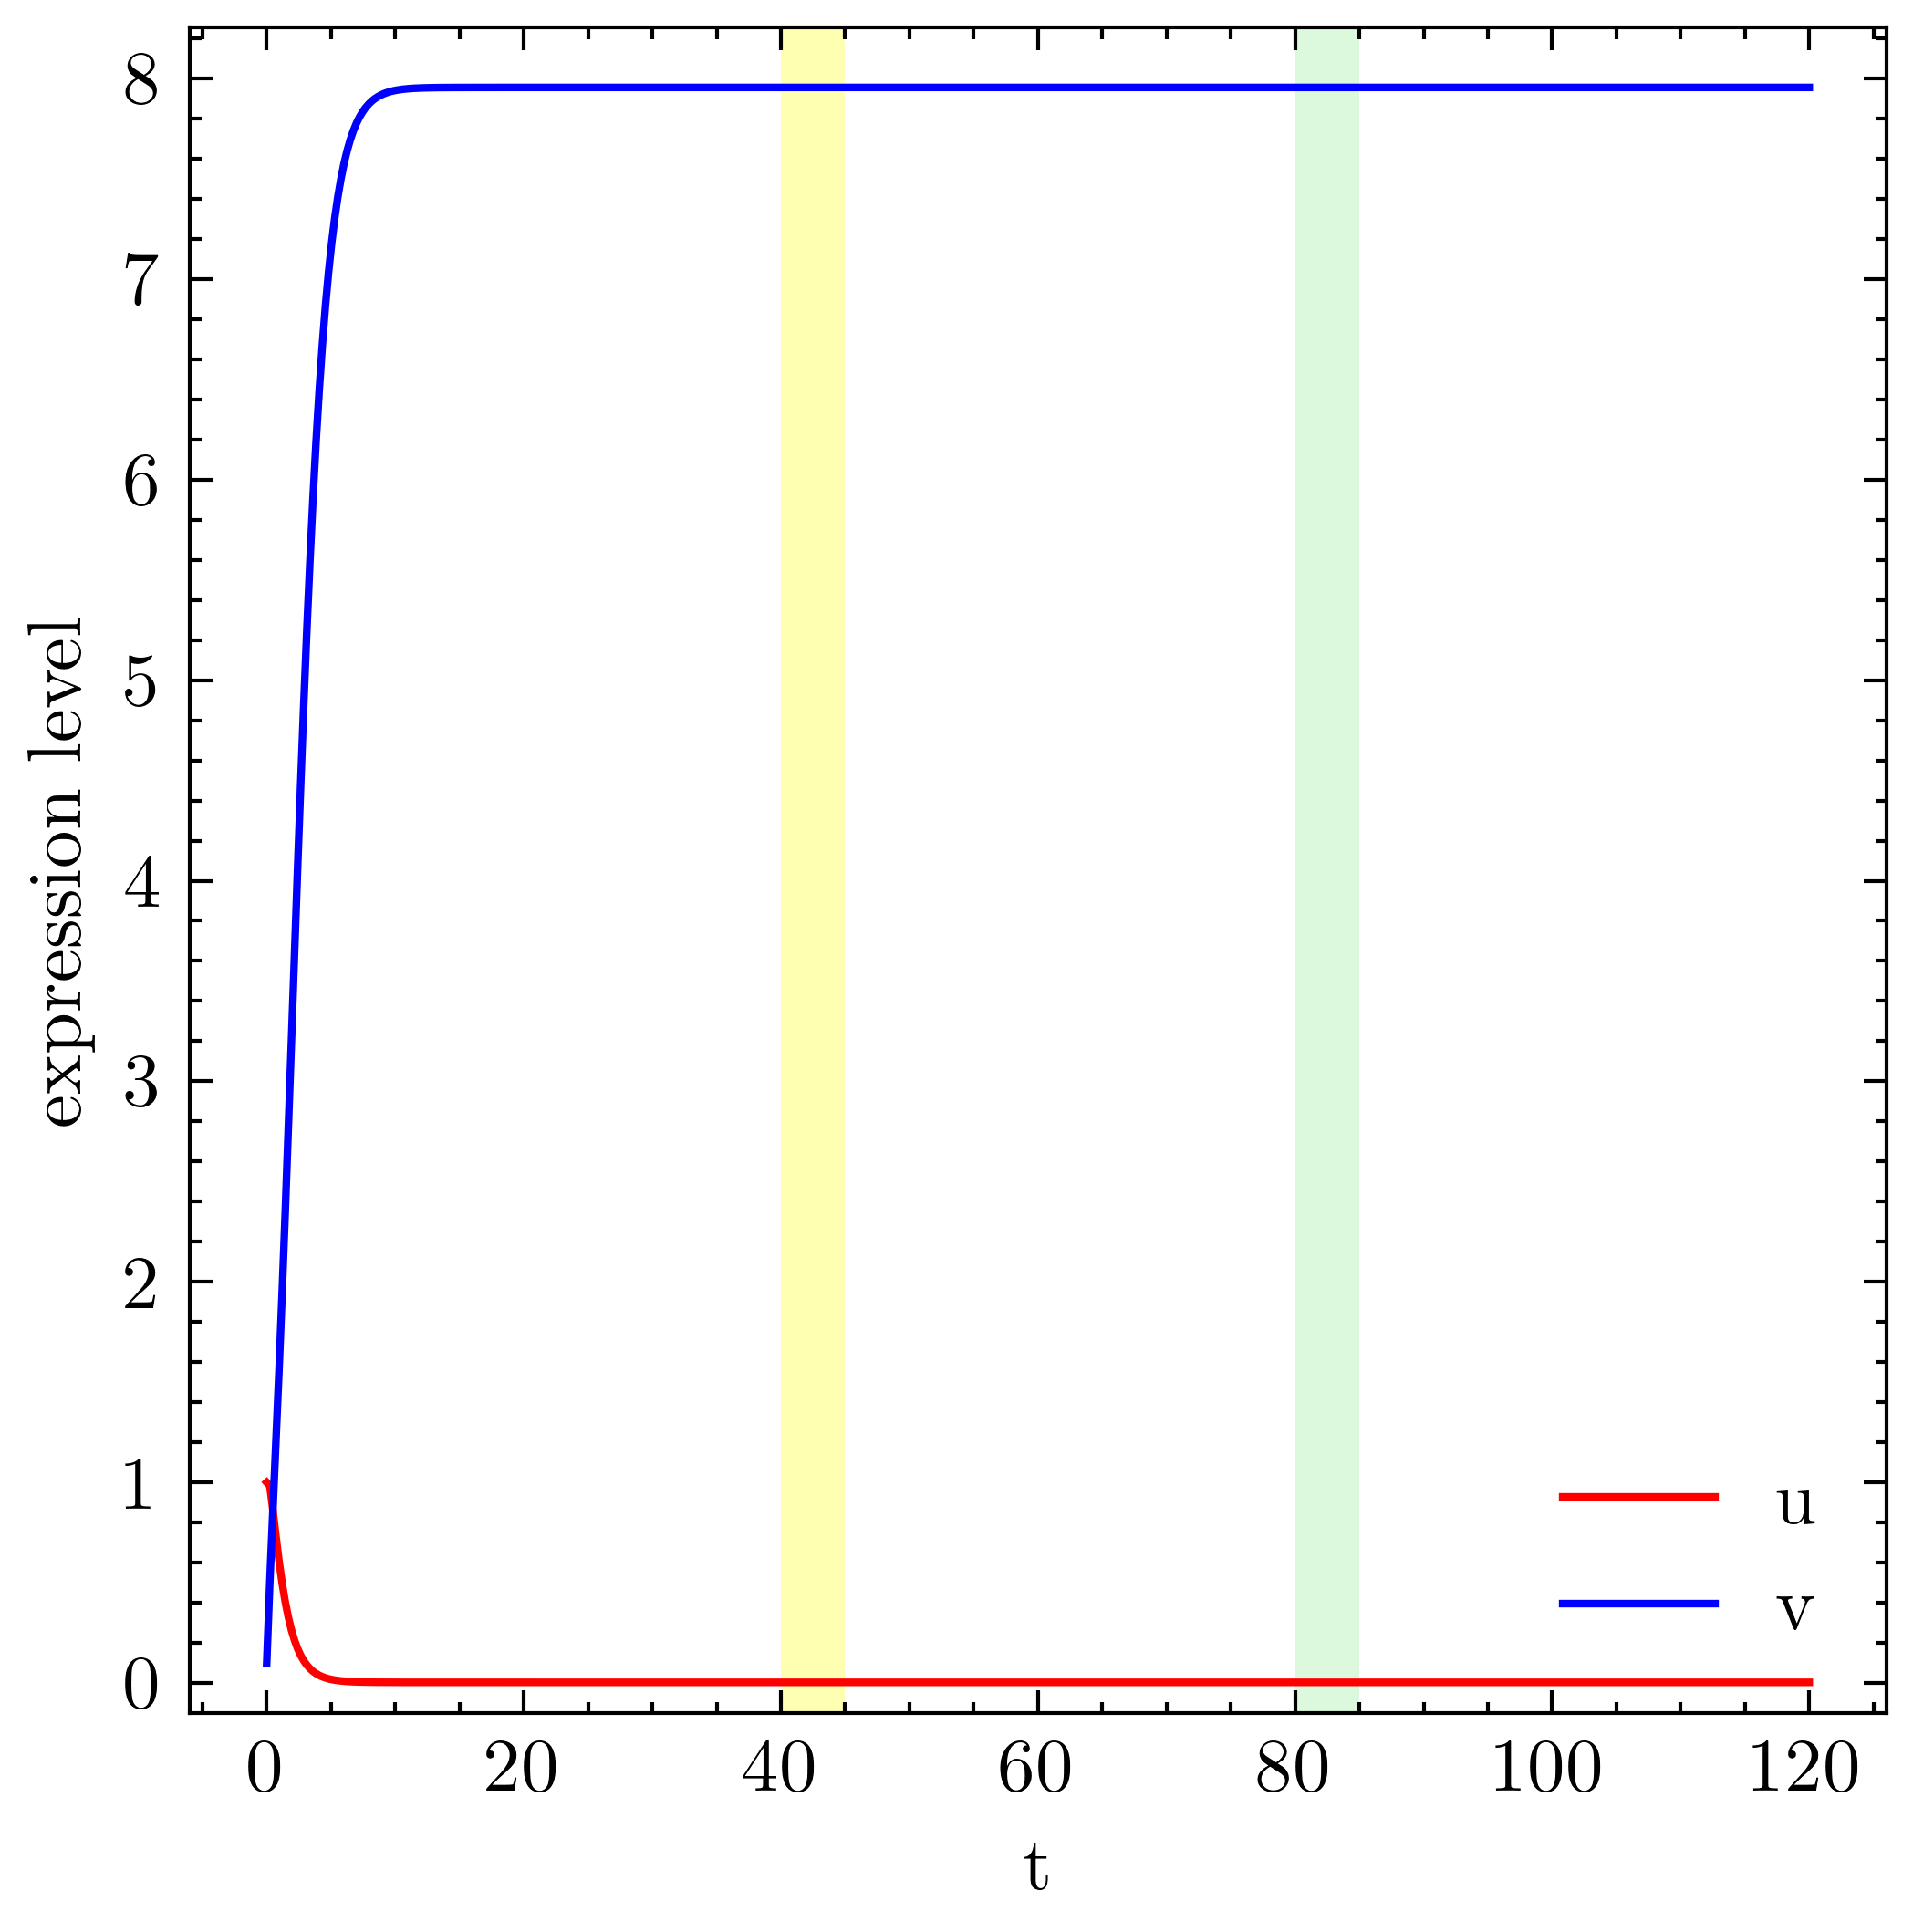

In [8]:
alpha_1 = 2
alpha_2 = 8
beta = 3
gamma = 2
initial_u = 1
initial_v = 0.1

t_end = 120
steps = 500

ts = np.linspace(0, t_end, steps)
result = odeint(single_step, [initial_u, initial_v], ts)
u, v = result.T

plot_circuit(u, v, ts)